<b> This notebook aggregates the results from 100 iterations of random forest. </b>
    
Notebook by YB & RM

Environment (Qiime2 2018.11)

In [1]:
%matplotlib inline

import numpy as np, pandas as pd, qiime2 as q2, seaborn as sns
import os
from skbio import DistanceMatrix
from scipy.spatial import procrustes
from skbio.stats.ordination import pcoa



Download the results from the N jobs that you run on barnacle.

In [2]:
#random-forests-results
#Metabolomics
#MP_Common/MP_Common
#Metagenome
#MG_gOTU
#16S
#Serum_Proteins
#MB_Norm

for i in range(1, 100):
    visualization = os.path.join('MG_gOTU', str(i), 'accuracy_results.qzv')
    data_path = os.path.join('MG_gOTU', str(i), 'results')
    
    artifact = q2.Visualization.load(visualization)
    artifact.export_data(data_path)
    
    features = os.path.join('MG_gOTU', str(i), 'feature_importance.qza')
    feat_path = os.path.join('MG_gOTU', str(i), 'features')
    
    artifact_feat = q2.Artifact.load(features)
    artifact_feat.export_data(feat_path)

Compile the results together from `predictive_accuracy.tsv`. Probably better to put them all in a single dataframe.

In [3]:
collation = []

for i in range(1, 100):
    results_path = os.path.join('MG_gOTU', str(i), 'results', 'predictive_accuracy.tsv')
    
    collation.append(pd.read_table(results_path))
    
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [4]:
collation.rename(columns = {'Mean squared error' : 'Mean squared error_MGgOTU'}, inplace=True)

In [5]:
collation['Data_type'] = 'MGgOTU'

In [6]:
collation['Mean squared error_MGgOTU_scaled'] = ((collation['Mean squared error_MGgOTU']**(0.5))*9)**2

In [7]:
collation_melt = collation.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_MGgOTU_scaled')

In [8]:
#random-forests-results
#Metabolomics
#MP_Common/MP_Common
#Metagenome
#16S
#Serum_Proteins

for i in range(1, 100):
    visualization = os.path.join('Metagenome', str(i), 'accuracy_results.qzv')
    data_path = os.path.join('Metagenome', str(i), 'results')
    
    artifact = q2.Visualization.load(visualization)
    artifact.export_data(data_path)
    
    features = os.path.join('Metagenome', str(i), 'feature_importance.qza')
    feat_path = os.path.join('Metagenome', str(i), 'features')
    
    artifact_feat = q2.Artifact.load(features)
    artifact_feat.export_data(feat_path)

In [9]:
collation2 = []

for i in range(1, 100):
    results_path = os.path.join('Metagenome', str(i), 'results', 'predictive_accuracy.tsv')
    
    collation2.append(pd.read_table(results_path))
    
collation2 = pd.concat(collation2)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [10]:
collation2.rename(columns = {'Mean squared error' : 'Mean squared error_MG'}, inplace=True)

In [11]:
collation2['Data_type'] = 'MG'

In [12]:
collation2_melt = collation2.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_MG')

In [3]:
#random-forests-results
#Metabolomics
#MP_Common/MP_Common
#Metagenome
#16S
#Serum_Proteins

for i in range(1, 100):
    visualization = os.path.join('16S', str(i), 'accuracy_results.qzv')
    data_path = os.path.join('16S', str(i), 'results')
    
    artifact = q2.Visualization.load(visualization)
    artifact.export_data(data_path)
    
    features = os.path.join('16S', str(i), 'feature_importance.qza')
    feat_path = os.path.join('16S', str(i), 'features')
    
    artifact_feat = q2.Artifact.load(features)
    artifact_feat.export_data(feat_path)

In [4]:
collation3 = []

for i in range(1, 100):
    results_path = os.path.join('16S', str(i), 'results', 'predictive_accuracy.tsv')
    
    collation3.append(pd.read_table(results_path))
    
collation3 = pd.concat(collation3)

In [5]:
collation3['Data_type'] = '16S'

In [6]:
collation3.rename(columns = {'Mean squared error' : 'Mean squared error_16S'}, inplace=True)


In [17]:
collation3_melt = collation3.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_16S')

In [18]:
#random-forests-results
#Metabolomics
#MP_Common/MP_Common
#Metagenome
#16S
#Serum_Proteins

for i in range(1, 100):
    visualization = os.path.join('MP_Common/MP_Common', str(i), 'accuracy_results.qzv')
    data_path = os.path.join('MP_Common/MP_Common', str(i), 'results')
    
    artifact = q2.Visualization.load(visualization)
    artifact.export_data(data_path)
    
    features = os.path.join('MP_Common/MP_Common', str(i), 'feature_importance.qza')
    feat_path = os.path.join('MP_Common/MP_Common', str(i), 'features')
    
    artifact_feat = q2.Artifact.load(features)
    artifact_feat.export_data(feat_path)

In [19]:
collation4 = []

for i in range(1, 100):
    results_path = os.path.join('MP_Common/MP_Common', str(i), 'results', 'predictive_accuracy.tsv')
    
    collation4.append(pd.read_table(results_path))
    
collation4 = pd.concat(collation4)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [20]:
collation4['Data_type'] = 'Metaproteome'

In [21]:
collation4.rename(columns = {'Mean squared error' : 'Mean squared error_Metaproteome'}, inplace=True)

In [22]:
collation4_melt = collation4.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_Metaproteome')

In [23]:
#random-forests-results
#Metabolomics
#MP_Common/MP_Common
#Metagenome
#16S
#Serum_Proteins

for i in range(1, 100):
    visualization = os.path.join('MB_Norm', str(i), 'accuracy_results.qzv')
    data_path = os.path.join('MB_Norm', str(i), 'results')
    
    artifact = q2.Visualization.load(visualization)
    artifact.export_data(data_path)
    
    features = os.path.join('MB_Norm', str(i), 'feature_importance.qza')
    feat_path = os.path.join('MB_Norm', str(i), 'features')
    
    artifact_feat = q2.Artifact.load(features)
    artifact_feat.export_data(feat_path)    

In [24]:
collation5 = []

for i in range(1, 100):
    results_path = os.path.join('MB_Norm', str(i), 'results', 'predictive_accuracy.tsv')
    
    collation5.append(pd.read_table(results_path))
    
collation5 = pd.concat(collation5)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [25]:
collation5['Data_type'] = 'Metabolome'

In [26]:
collation5.rename(columns = {'Mean squared error' : 'Mean squared error_Metabolome'}, inplace=True)

In [27]:
collation5_melt = collation5.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_Metabolome')

In [28]:
#random-forests-results - this is the folder name for the combined results
#random-forests-results
#Metabolomics
#MP_Common/MP_Common
#Metagenome
#16S
#Serum_Proteins

for i in range(1, 100):
    visualization = os.path.join('allfeatgotu_Norm', str(i), 'accuracy_results.qzv')
    data_path = os.path.join('allfeatgotu_Norm', str(i), 'results')
    
    artifact = q2.Visualization.load(visualization)
    artifact.export_data(data_path)
    
    features = os.path.join('allfeatgotu_Norm', str(i), 'feature_importance.qza')
    feat_path = os.path.join('allfeatgotu_Norm', str(i), 'features')
    
    artifact_feat = q2.Artifact.load(features)
    artifact_feat.export_data(feat_path)

In [29]:
collation6 = []

for i in range(1, 100):
    results_path = os.path.join('allfeatgotu_Norm', str(i), 'results', 'predictive_accuracy.tsv')
    
    collation6.append(pd.read_table(results_path))
    
collation6 = pd.concat(collation6)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [30]:
collation6['Data_type'] = 'Combined Data'

In [31]:
collation6.rename(columns = {'Mean squared error' : 'Mean squared error_Combined'}, inplace=True)

In [32]:
collation6_melt = collation6.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_Combined')

In [33]:
#random-forests-results - this is the folder name for the combined results
#random-forests-results
#Metabolomics
#MP_Common/MP_Common
#Metagenome
#16S
#Serum_Proteins

for i in range(1, 100):
    visualization = os.path.join('Serum_Proteins', str(i), 'accuracy_results.qzv')
    data_path = os.path.join('Serum_Proteins', str(i), 'results')
    
    artifact = q2.Visualization.load(visualization)
    artifact.export_data(data_path)
    
    features = os.path.join('Serum_Proteins', str(i), 'feature_importance.qza')
    feat_path = os.path.join('Serum_Proteins', str(i), 'features')
    
    artifact_feat = q2.Artifact.load(features)
    artifact_feat.export_data(feat_path)

In [34]:
collation7 = []

for i in range(1, 100):
    results_path = os.path.join('Serum_Proteins', str(i), 'results', 'predictive_accuracy.tsv')
    
    collation7.append(pd.read_table(results_path))
    
collation7 = pd.concat(collation7)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [35]:
collation7['Data_type'] = 'Serum_Proteins'

In [36]:
collation7.rename(columns = {'Mean squared error' : 'Mean squared error_Serum'}, inplace=True)

In [37]:
collation7_melt = collation7.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_Serum')

In [38]:
merge_melt = pd.concat([collation_melt,collation2_melt,collation3_melt,collation4_melt,collation5_melt,collation6_melt,collation7_melt])

In [39]:
order = ['Metabolome', 'Combined Data', 'Metaproteome', 'MG','MGgOTU', '16S', 'Serum_Proteins']

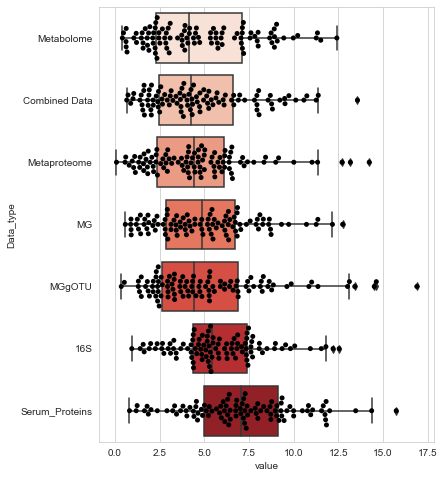

In [40]:
#Plot the RF mean squared error values in each data type

import matplotlib.pyplot as plt

#Set style to have grids
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (6,8))
#sns.violinplot(x = 'value', y = 'Description', inner = None, data = merge_melt,cut=0, palette = sns.hls_palette(20, l=.4, s=.8))
sns.swarmplot(x = 'value', y = 'Data_type', order = order, alpha = 1, data = merge_melt, color = 'black', size=5)
sns.boxplot(x = 'value', y = 'Data_type', order = order, data = merge_melt, palette = 'Reds')
#fig.autofmt_xdate(rotation = 90, ha = 'center')
plt.savefig('./DataType_RF_MeanSqurdError_boxplots_UC40_3.pdf', bbox_inches = 'tight')

### Updates with second cohort

In [41]:
#random-forests-results
#IBD200/16S
#IBD200/Combined2
#IBD200/MBNorm
#IBD200/MGgOTU
#IBD200/MG
#IBD200/MP

for i in range(1, 100):
    if os.path.exists('IBD200/16S/%s' % str(i)):
        visualization = os.path.join('IBD200/16S', str(i), 'accuracy_results.qzv')
        data_path = os.path.join('IBD200/16S', str(i), 'results')

        artifact = q2.Visualization.load(visualization)
        artifact.export_data(data_path)
        
        features = os.path.join('IBD200/16S', str(i), 'feature_importance.qza')
        feat_path = os.path.join('IBD200/16S', str(i), 'features')
    
        artifact_feat = q2.Artifact.load(features)
        artifact_feat.export_data(feat_path)

In [42]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/16S/%s' % str(i)):
        results_path = os.path.join('IBD200/16S/%s' % str(i), 'results', 'predictive_accuracy.tsv')

        collation.append(pd.read_table(results_path))
    
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  import sys


In [43]:
collation.rename(columns = {'Mean squared error' : 'Mean squared error_16S'}, inplace=True)

In [44]:
collation['Data_type'] = '16S'

In [45]:
collation_melt = collation.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_16S')

In [46]:
#random-forests-results
#IBD200/16S
#IBD200/Combined
#IBD200/MB
#IBD200/MGgOTU
#IBD200/MP

for i in range(1, 100):
    if os.path.exists('IBD200/Combined2/%s' % str(i)):
        visualization = os.path.join('IBD200/Combined2', str(i), 'accuracy_results.qzv')
        data_path = os.path.join('IBD200/Combined2', str(i), 'results')

        artifact = q2.Visualization.load(visualization)
        artifact.export_data(data_path)
        
        features = os.path.join('IBD200/Combined2', str(i), 'feature_importance.qza')
        feat_path = os.path.join('IBD200/Combined2', str(i), 'features')
    
        artifact_feat = q2.Artifact.load(features)
        artifact_feat.export_data(feat_path)

In [47]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/Combined2/%s' % str(i)):
        results_path = os.path.join('IBD200/Combined2/%s' % str(i), 'results', 'predictive_accuracy.tsv')

        collation.append(pd.read_table(results_path))
    
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  import sys


In [48]:
collation.rename(columns = {'Mean squared error' : 'Mean squared error_Combined'}, inplace=True)

In [49]:
collation['Data_type'] = 'Combined Data'

In [50]:
collation_melt2 = collation.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_Combined')

In [51]:
#random-forests-results
#IBD200/16S
#IBD200/Combined
#IBD200/MB
#IBD200/MGgOTU
#IBD200/MP

for i in range(1, 100):
    if os.path.exists('IBD200/MBNorm/%s' % str(i)):
        visualization = os.path.join('IBD200/MBNorm', str(i), 'accuracy_results.qzv')
        data_path = os.path.join('IBD200/MBNorm', str(i), 'results')

        artifact = q2.Visualization.load(visualization)
        artifact.export_data(data_path)
        
        features = os.path.join('IBD200/MBNorm', str(i), 'feature_importance.qza')
        feat_path = os.path.join('IBD200/MBNorm', str(i), 'features')
    
        artifact_feat = q2.Artifact.load(features)
        artifact_feat.export_data(feat_path)

In [52]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/MBNorm/%s' % str(i)):
        results_path = os.path.join('IBD200/MBNorm/%s' % str(i), 'results', 'predictive_accuracy.tsv')

        collation.append(pd.read_table(results_path))
    
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  import sys


In [53]:
collation.rename(columns = {'Mean squared error' : 'Mean squared error_MB'}, inplace=True)

In [54]:
collation['Data_type'] = 'Metabolome'

In [55]:
collation_melt3 = collation.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_MB')

In [56]:
#random-forests-results
#IBD200/16S
#IBD200/Combined
#IBD200/MB
#IBD200/MGgOTU
#IBD200/MP

for i in range(1, 100):
    if os.path.exists('IBD200/MGgOTU/%s' % str(i)):
        visualization = os.path.join('IBD200/MGgOTU', str(i), 'accuracy_results.qzv')
        data_path = os.path.join('IBD200/MGgOTU', str(i), 'results')

        artifact = q2.Visualization.load(visualization)
        artifact.export_data(data_path)
        features = os.path.join('IBD200/MGgOTU', str(i), 'feature_importance.qza')
        feat_path = os.path.join('IBD200/MGgOTU', str(i), 'features')
    
        artifact_feat = q2.Artifact.load(features)
        artifact_feat.export_data(feat_path)

In [57]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/MGgOTU/%s' % str(i)):
        results_path = os.path.join('IBD200/MGgOTU/%s' % str(i), 'results', 'predictive_accuracy.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [58]:
collation.rename(columns = {'Mean squared error' : 'Mean squared error_MGgOTU'}, inplace=True)

In [59]:
collation['Data_type'] = 'Metagenome'

In [60]:
collation_melt4 = collation.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_MGgOTU')

In [61]:
#random-forests-results
#IBD200/16S
#IBD200/Combined
#IBD200/MB
#IBD200/MGgOTU
#IBD200/MP

for i in range(1, 100):
    if os.path.exists('IBD200/MP/%s' % str(i)):
        visualization = os.path.join('IBD200/MP', str(i), 'accuracy_results.qzv')
        data_path = os.path.join('IBD200/MP', str(i), 'results')

        artifact = q2.Visualization.load(visualization)
        artifact.export_data(data_path)
        features = os.path.join('IBD200/MP', str(i), 'feature_importance.qza')
        feat_path = os.path.join('IBD200/MP', str(i), 'features')
    
        artifact_feat = q2.Artifact.load(features)
        artifact_feat.export_data(feat_path)

In [62]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/MP/%s' % str(i)):
        results_path = os.path.join('IBD200/MP/%s' % str(i), 'results', 'predictive_accuracy.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [63]:
collation.rename(columns = {'Mean squared error' : 'Mean squared error_MP'}, inplace=True)

In [64]:
collation['Data_type'] = 'Metaproteome'

In [65]:
collation_melt5 = collation.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_MP')

In [66]:
#random-forests-results
#IBD200/16S
#IBD200/Combined
#IBD200/MB
#IBD200/MGgOTU
#IBD200/MP

for i in range(1, 100):
    if os.path.exists('IBD200/MG/%s' % str(i)):
        visualization = os.path.join('IBD200/MG', str(i), 'accuracy_results.qzv')
        data_path = os.path.join('IBD200/MG', str(i), 'results')

        artifact = q2.Visualization.load(visualization)
        artifact.export_data(data_path)
        features = os.path.join('IBD200/MG', str(i), 'feature_importance.qza')
        feat_path = os.path.join('IBD200/MG', str(i), 'features')
    
        artifact_feat = q2.Artifact.load(features)
        artifact_feat.export_data(feat_path)

In [67]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/MG/%s' % str(i)):
        results_path = os.path.join('IBD200/MG/%s' % str(i), 'results', 'predictive_accuracy.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [68]:
collation.rename(columns = {'Mean squared error' : 'Mean squared error_MG'}, inplace=True)
collation['Data_type'] = 'Metagenome_ReadBased'

#This version was done on a different scale (0-1 instead of 0-9 scale, so adjusting errors accordingly)
collation['Mean squared error_MG_scaled'] = ((collation['Mean squared error_MG']**(0.5))*9)**2
collation_melt6 = collation.melt(id_vars = 'Data_type', value_vars = 'Mean squared error_MG_scaled')

In [69]:
merge_melt2 = pd.concat([collation_melt,collation_melt2,collation_melt3,collation_melt4,collation_melt5,collation_melt6])

In [70]:
order = ['16S', 'Combined Data', 'Metabolome', 'Metagenome','Metagenome_ReadBased', 'Metaproteome']

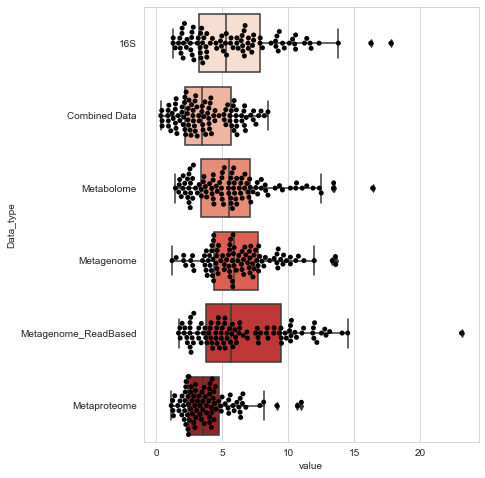

In [71]:
#Plot the RF mean squared error values in each data type

import matplotlib.pyplot as plt

#Set style to have grids
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (6,8))
#sns.violinplot(x = 'value', y = 'Description', inner = None, data = merge_melt,cut=0, palette = sns.hls_palette(20, l=.4, s=.8))
sns.swarmplot(x = 'value', y = 'Data_type', order = order, alpha = 1, data = merge_melt2, color = 'black', size=5)
sns.boxplot(x = 'value', y = 'Data_type', order = order, data = merge_melt2, palette = 'Reds')
#fig.autofmt_xdate(rotation = 90, ha = 'center')
plt.savefig('./DataType_RF_MeanSqurdError_IBD200UCsub_boxplots3.pdf', bbox_inches = 'tight')

In [72]:
#Rename columns to align between studies
merge_melt['Data_type'].replace({'MGgOTU':'Metagenome','Serum_Proteins':'Serum Proteome'},inplace=True)

In [73]:
merge_melt['Data_set'] = 'UC40'
merge_melt2['Data_set'] = 'IBD200'

In [74]:
merge_melt_combined = pd.concat([merge_melt2,merge_melt])
merge_melt_combined[merge_melt_combined['Data_type']=='Metagenome']

,Data_type,variable,value,Data_set
0,Metagenome,Mean squared error_MGgOTU,6.453419,IBD200
1,Metagenome,Mean squared error_MGgOTU,8.150869,IBD200
2,Metagenome,Mean squared error_MGgOTU,6.616894,IBD200
3,Metagenome,Mean squared error_MGgOTU,9.144380,IBD200
4,Metagenome,Mean squared error_MGgOTU,5.558104,IBD200
5,Metagenome,Mean squared error_MGgOTU,9.208654,IBD200
6,Metagenome,Mean squared error_MGgOTU,13.571502,IBD200
7,Metagenome,Mean squared error_MGgOTU,2.077243,IBD200
8,Metagenome,Mean squared error_MGgOTU,7.762024,IBD200
9,Metagenome,Mean squared error_MGgOTU,6.623045,IBD200


In [89]:
order = ['Metaproteome','Combined Data','Metabolome',  'Metagenome', '16S','Serum Proteome']

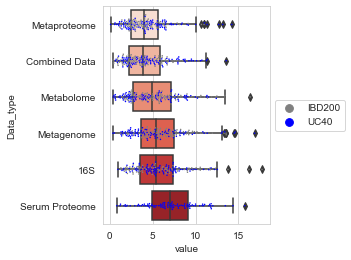

In [90]:
#Plot the RF mean squared error values in each data type

import matplotlib.pyplot as plt

#Set style to have grids
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (3,4))
#sns.violinplot(x = 'value', y = 'Description', inner = None, data = merge_melt,cut=0, palette = sns.hls_palette(20, l=.4, s=.8))
sns.swarmplot(x = 'value', y = 'Data_type', order = order, alpha = 1, data = merge_melt_combined, hue='Data_set',palette=['gray','blue'], size=1.5)
sns.boxplot(x = 'value', y = 'Data_type', order = order, data = merge_melt_combined, palette = 'Reds')
#fig.autofmt_xdate(rotation = 90, ha = 'center')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./DataType_RF_MeanSqurdError_CombinedData_boxplots_gOTUs2.pdf', bbox_inches = 'tight')

In [77]:
#Determine statistics on different datatypes:
Combined = merge_melt_combined[merge_melt_combined['Data_type'] == 'Combined Data']

In [78]:
Combined['value'].describe()

count    198.000000
mean       4.298612
std        2.566092
min        0.355161
25%        2.279609
50%        3.866287
75%        5.899767
max       13.575550
Name: value, dtype: float64

In [79]:
#Determine statistics on different datatypes:
Amp = merge_melt_combined[merge_melt_combined['Data_type'] == '16S']

In [80]:
Amp['value'].describe()

count    189.000000
mean       5.877531
std        2.986770
min        0.943937
25%        3.525311
50%        5.379755
75%        7.383990
max       17.766824
Name: value, dtype: float64

In [81]:
#Determine statistics on different datatypes:
MP = merge_melt_combined[merge_melt_combined['Data_type'] == 'Metaproteome']

In [82]:
MP['value'].describe()

count    191.000000
mean       4.281190
std        2.472172
min        0.087874
25%        2.428654
50%        4.043434
75%        5.577758
max       14.233450
Name: value, dtype: float64

In [83]:
#Determine statistics on different datatypes:
MB = merge_melt_combined[merge_melt_combined['Data_type'] == 'Metabolome']

In [84]:
MB['value'].describe()

count    198.000000
mean       5.270654
std        3.044406
min        0.417317
25%        2.683058
50%        4.945426
75%        7.132563
max       16.384633
Name: value, dtype: float64

In [85]:
#Determine statistics on different datatypes:
MG = merge_melt_combined[merge_melt_combined['Data_type'] == 'Metagenome']

In [86]:
MG['value'].describe()

count    198.000000
mean       5.811956
std        3.068117
min        0.354225
25%        3.671058
50%        5.403479
75%        7.482798
max       16.899382
Name: value, dtype: float64

In [87]:
#Determine statistics on different datatypes:
SP = merge_melt_combined[merge_melt_combined['Data_type'] == 'Serum Proteome']

In [88]:
SP['value'].describe()

count    99.000000
mean      7.106859
std       3.054861
min       0.816064
25%       4.958853
50%       7.049061
75%       9.128139
max      15.746500
Name: value, dtype: float64

### Aggregate RF feature importance

In [2]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/MP/%s' % str(i)):
        results_path = os.path.join('IBD200/MP/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [3]:
collation2=collation.groupby('feature')['importance'].sum()
MP100=collation2.to_frame().sort_values(by='importance',ascending=False)

In [4]:
protein_ann = pd.read_csv('../../IBD200/Metagenomics/MGDB/MGDB_Full_Protein_Annotations_AllProteomic_hits2.csv')

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
MP100=MP100.merge(protein_ann,left_on='feature',right_on='queryID',how='left')
MP100.index=MP100['queryID']
MP100['Protein_and_Species']=MP100['Protein names'] + ' ' +MP100['Species']

In [6]:
IBD200MP=MP100.groupby('Protein_and_Species')['importance'].sum().to_frame().sort_values(by='importance',ascending=False)

In [7]:
collation = []

for i in range(1, 100):
    if os.path.exists('MP_Common/MP_Common/%s' % str(i)):
        results_path = os.path.join('MP_Common/MP_Common/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [8]:
collation2=collation.groupby('feature')['importance'].sum()
MP100=collation2.to_frame().sort_values(by='importance',ascending=False)

In [98]:
protein_meta = pd.read_csv('../../IBD200/Metagenomics/MGDB/UC40_Full_Protein_Annotations_All_hitsV2.csv')

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,22,31,36,37,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
MP100=MP100.merge(protein_ann,left_on='feature',right_on='queryID',how='left')
MP100.index=MP100['queryID']
MP100['Protein_and_Species']=MP100['Protein names'] + ' ' +MP100['Species']

In [100]:
UC40MP=MP100.groupby('Protein_and_Species')['importance'].sum().to_frame().sort_values(by='importance',ascending=False)

In [101]:
UC40MP.rename(columns={'importance':'Importance (Cohort1)'},inplace=True)
IBD200MP.rename(columns={'importance':'Importance (Cohort2)'},inplace=True)
MPtab=UC40MP.merge(IBD200MP,left_index=True,right_index=True,how='outer')
MPtab['Importance (Cohort1)'] = MPtab['Importance (Cohort1)']/MPtab['Importance (Cohort1)'].sum()
MPtab['Importance (Cohort2)'] = MPtab['Importance (Cohort2)']/MPtab['Importance (Cohort2)'].sum()
MPtab=MPtab.fillna(0)

In [102]:
MPtab['Importance Sum'] = MPtab['Importance (Cohort1)']+MPtab['Importance (Cohort2)']

In [103]:
MPtab=MPtab.sort_values(by='Importance Sum',ascending=False)[0:100]

In [145]:
MPtab.to_csv('./Top100_MP_CombinedCohorts.csv')

In [10]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/MGgOTU/%s' % str(i)):
        results_path = os.path.join('IBD200/MGgOTU/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
IBD200=collation2.to_frame().sort_values(by='importance',ascending=False)

In [11]:
collation = []

for i in range(1, 100):
    if os.path.exists('MG_gOTU/%s' % str(i)):
        results_path = os.path.join('MG_gOTU/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
UC40=collation2.to_frame().sort_values(by='importance',ascending=False)

In [12]:
UC40.rename(columns={'importance':'Importance (Cohort1)'},inplace=True)
IBD200.rename(columns={'importance':'Importance (Cohort2)'},inplace=True)
MGtab=UC40.merge(IBD200,left_index=True,right_index=True,how='outer')
MGtab['Importance (Cohort1)'] = MGtab['Importance (Cohort1)']/MGtab['Importance (Cohort1)'].sum()
MGtab['Importance (Cohort2)'] = MGtab['Importance (Cohort2)']/MGtab['Importance (Cohort2)'].sum()
MGtab=MGtab.fillna(0)

In [13]:
MGtab['Importance Sum'] = MGtab['Importance (Cohort1)']+MGtab['Importance (Cohort2)']

In [14]:
ann=pd.read_csv('../../IBD200/lineage.txt',sep='\t',header=None)
ann.rename(columns={0:'gOTU',1:'Lineage'},inplace=True)

In [15]:
MGtab=MGtab.merge(ann,left_index=True,right_on='gOTU',how='left')
MGtab=MGtab.sort_values(by='Importance Sum',ascending=False)[0:100]

In [16]:
MGtab.index=MGtab['gOTU']

In [146]:
MGtab.to_csv('./Top100_MG_CombinedCohorts.csv')

In [111]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/16S/%s' % str(i)):
        results_path = os.path.join('IBD200/16S/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
IBD200=collation2.to_frame().sort_values(by='importance',ascending=False)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [112]:
collation = []

for i in range(1, 100):
    if os.path.exists('16S/%s' % str(i)):
        results_path = os.path.join('16S/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
UC40=collation2.to_frame().sort_values(by='importance',ascending=False)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [113]:
UC40.rename(columns={'importance':'Importance (Cohort1)'},inplace=True)
IBD200.rename(columns={'importance':'Importance (Cohort2)'},inplace=True)
amptab=UC40.merge(IBD200,left_index=True,right_index=True,how='outer')
amptab['Importance (Cohort1)'] = amptab['Importance (Cohort1)']/amptab['Importance (Cohort1)'].sum()
amptab['Importance (Cohort2)'] = amptab['Importance (Cohort2)']/amptab['Importance (Cohort2)'].sum()
amptab=amptab.fillna(0)

In [114]:
amptab['Importance Sum'] = amptab['Importance (Cohort1)']+amptab['Importance (Cohort2)']

In [115]:
ann=pd.read_csv('../Genomics/16S/Taxonomy_metadata.tsv',sep='\t')
ann2=pd.read_csv('./IBD20016STaxonomy.tsv/taxonomy.tsv',sep='\t')

anns=pd.concat([ann,ann2])
amptab=amptab.merge(anns,left_index=True,right_on='Feature ID',how='left')
amptab.index = amptab['Taxon']
columns=['Importance (Cohort1)','Importance (Cohort2)','Importance Sum']
amptab=amptab[columns]
amptab=amptab.drop_duplicates()
amptab=amptab.sort_values(by='Importance Sum',ascending=False)[0:100]

In [147]:
amptab.to_csv('./Top100_16S_CombinedCohorts.csv')

In [118]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/MBNorm/%s' % str(i)):
        results_path = os.path.join('IBD200/MBNorm/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
IBD200=collation2.to_frame().sort_values(by='importance',ascending=False)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [119]:
collation = []

for i in range(1, 100):
    if os.path.exists('MB_Norm/%s' % str(i)):
        results_path = os.path.join('MB_Norm/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
UC40=collation2.to_frame().sort_values(by='importance',ascending=False)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [120]:
ann2=pd.read_csv('../Metabolomics/StandardizedMzMIne2020Rerun/UC40_MB_Annotations.txt',sep='\t')
ann=pd.read_csv('../../IBD200/Metabolomics/Qemistree_IDs.txt',sep='\t')

In [124]:
UC40=UC40.merge(ann2,left_index=True,right_on='rowID',how='left')
IBD200=IBD200.merge(ann,left_index=True,right_on='rowid',how='left')

In [130]:
IBD200=IBD200.fillna('None')
IBD200['LibraryMatch_and_DirectParent']=IBD200['ms2_library_match']+ ' '+IBD200['direct_parent']

UC40=UC40.fillna('None')
UC40['LibraryMatch_and_DirectParent']=UC40['ms2_library_match']+ ' '+UC40['direct_parent']

In [135]:
UC40MB=UC40.groupby('LibraryMatch_and_DirectParent')['importance'].sum().to_frame().sort_values(by='importance',ascending=False)
IBD200MB=IBD200.groupby('LibraryMatch_and_DirectParent')['importance'].sum().to_frame().sort_values(by='importance',ascending=False)

In [139]:
UC40MB.rename(columns={'importance':'Importance (Cohort1)'},inplace=True)
IBD200MB.rename(columns={'importance':'Importance (Cohort2)'},inplace=True)

MBtab=UC40MB.merge(IBD200MB,left_on='LibraryMatch_and_DirectParent',right_on='LibraryMatch_and_DirectParent',how='outer')
MBtab['Importance (Cohort1)'] = MBtab['Importance (Cohort1)']/MBtab['Importance (Cohort1)'].sum()
MBtab['Importance (Cohort2)'] = MBtab['Importance (Cohort2)']/MBtab['Importance (Cohort2)'].sum()
MBtab=MBtab.fillna(0)

In [141]:
MBtab['Importance Sum'] = MBtab['Importance (Cohort1)']+MBtab['Importance (Cohort2)']
MBtab=MBtab.sort_values(by='Importance Sum',ascending=False)[0:100]

In [148]:
MBtab.to_csv('./Top100_MB_CombinedCohorts.csv')

In [154]:
collation = []

for i in range(1, 100):
    if os.path.exists('Serum_Proteins/%s' % str(i)):
        results_path = os.path.join('Serum_Proteins/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
UC40=collation2.to_frame().sort_values(by='importance',ascending=False)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [158]:
ann = pd.read_csv('../Serum/All_uniprot_annotations.txt',sep='\t')
UC40=UC40.merge(ann,left_index=True,right_on='Entry')
UC40.index=UC40['Entry']


In [161]:
UC40[0:100].to_csv('./Top100_SerumProteins_UC1.csv')

In [9]:
collation = []

for i in range(1, 100):
    if os.path.exists('IBD200/Combined2/%s' % str(i)):
        results_path = os.path.join('IBD200/Combined2/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
IBD200=collation2.to_frame().sort_values(by='importance',ascending=False)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [35]:
collation = []

for i in range(1, 100):
    if os.path.exists('allfeatgotu_Norm/%s' % str(i)):
        results_path = os.path.join('allfeatgotu_Norm/%s' % str(i), 'features', 'importance.tsv')
        collation.append(pd.read_table(results_path))
collation = pd.concat(collation)
collation2=collation.groupby('feature')['importance'].sum()
UC40=collation2.to_frame().sort_values(by='importance',ascending=False)

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [59]:
#Annotate IBD200 top hits:
UC_MB=pd.read_csv('../Metabolomics/StandardizedMzMIne2020Rerun/UC40_MB_Annotations.txt',sep='\t',index_col='rowID')
IBD_MB=pd.read_csv('../../IBD200/Metabolomics/Qemistree_IDs.txt',sep='\t',index_col='rowid')
UC_16S=pd.read_csv('../Genomics/16S/Taxonomy_metadata.tsv',sep='\t',index_col='Feature ID')
IBD_16S=pd.read_csv('./IBD20016STaxonomy.tsv/taxonomy.tsv',sep='\t',index_col='Feature ID')
UC_Serum= pd.read_csv('../Serum/All_uniprot_annotations.txt',sep='\t',index_col='Entry')
MG=pd.read_csv('../../IBD200/lineage.txt',sep='\t',header=None)
MG.rename(columns={0:'gOTU',1:'Lineage'},inplace=True)
MG.index=MG['gOTU']
UC_MP=pd.read_csv('../../IBD200/Metagenomics/MGDB/UC40_Full_Protein_Annotations_All_hitsV2.csv',index_col='queryID')
IBD_MP=pd.read_csv('../../IBD200/Metagenomics/MGDB/MGDB_Full_Protein_Annotations_AllProteomic_hits2.csv',index_col='queryID')

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,22,31,36,37,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
UC_MB['Feature']=UC_MB.index
IBD_MB['Feature']=IBD_MB.index
IBD_MB['Feature']=IBD_MB['Feature'].astype('str')
UC_16S['Feature']=UC_16S.index
IBD_16S['Feature']=IBD_16S.index
UC_Serum['Feature']=UC_Serum.index
MG['Feature']=MG.index
UC_MP['Feature']=UC_MP.index
IBD_MP['Feature']=IBD_MP.index
UC_MP['Feature']= UC_MP['Feature']+'_MP'

In [64]:
IBD200.merge(IBD_MB,left_index=True,right_index=True)

,importance,csi_smiles,ms2_smiles,ms2_library_match,parent_mass,retention_time,table_number,smiles,structure_source,kingdom,superclass,class,subclass,direct_parent,Feature


In [65]:
UC_Ann=pd.concat([UC_MB,UC_16S,UC_Serum,MG,UC_MP])
IBD_Ann=pd.concat([IBD_MB,IBD_16S,MG,IBD_MP])

/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/Users/rhmills/miniconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [43]:
UC100_ann=UC40[0:100].merge(UC_Ann,left_index=True,right_on='Feature',how='left')

In [44]:
UC100_ann.to_csv('./UC40_combined_top100_annotated.csv')

In [67]:
IBD100_ann=IBD200[0:100].merge(IBD_Ann,left_index=True,right_on='Feature',how='left')

In [68]:
IBD100_ann.to_csv('./IBD200_combined_top100_annotated.csv')

In [49]:
IBD100_ann=IBD200.merge(IBD_Ann,left_index=True,right_on='Feature',how='left')
IBD100_ann.to_csv('./IBD200_combined_all_annotated.csv')